In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.FashionMNIST(
    root='data',  #train/test data가 저장되는 경로
    train=True,
    download=True, #root에 data가 없는 경우 다운로드
    transform=ToTensor() #numpy배열에서 torch image tensor로 변환
    #torchvision.transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()

)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
torch.randint(len(training_data), size=(1,))

tensor([57659])

In [ ]:
sample_idx = torch.randint(len(training_data), size=(1,1)).item()
training_data[sample_idx]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.2706, 0.0980, 0.1098, 0.2706,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0902, 0.1529, 0.4588, 0.8824, 0.8275, 0.4941,
           0.1333, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0275, 0.2000, 0.2549, 0.0078, 0.5686, 0.9725, 1.0000, 0.6039,
           0.0039, 0.1529, 0.1961, 0.0353, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.1294, 0.3098, 0.3529, 0.1608, 0.0078, 0.7059, 0.4392, 0.0353,
           0.1647, 0.1882, 0.2510, 0.1490, 

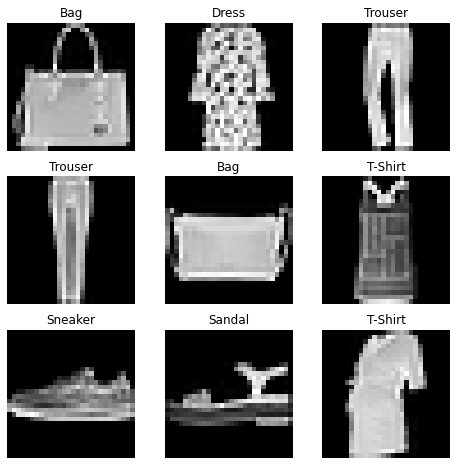

In [ ]:
#데이터셋 순회하고 시각화

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()  
  #주어진 범위내에서 정수를 균등하게 생성,  size=(1, ):1차원
  #item() : 텐서의 값을 표준 python 숫자로 반환함
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap='gray')

plt.show()


### 파일에서 사용자 정의 데이터셋 만들기
* 사용자 정의 Dataset클래스는 반드시 3개의 함수를 구현해야 함.  

```
__init__, __len__, __getitem__
```




In [ ]:
def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
  # __init함수는 dataset객체가 생성될 때 한번만 실행됨.
  # 이미지와 anotation file이 포함된 디렉토리와 두가지 변형(transform)을 초기화함

  self.img_labels = pd.read_csv(annotation_file)
  self.img_dir = img_dir
  self.transform = transform
  self.target_transform = target_transform

In [ ]:
def __len__(self):
  # __len__함수는 데이터셋의 샘플 개수를 반환함
  return len(self.img_labels)

In [ ]:
def __getitem__(self, idx):
  #__getitme__함수는 주어진 인덱스 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환함
  img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
  #인덱스를 기반으로 디스크에서 이미지의 위치를 식별
  image = read_image(img_path)  #read_image를 사용하여 이미지를 텐서로 변환
  label = self.img_labels.iloc[idx, 1]   #csv데이터로부터 해당하는 정답(label)을 가져옴
  if self.transform:                     #해당하는 경우, 변형(transform)함수들을 호출한뒤,
    image = self.transform(image)
  if self.target_transform:
    label = self.target_transform(label)
  sample = {'image':image, 'label':label} # 텐서 이미지와 라벨을 python dict형으로 반환함
  return sample

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image 

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform


  def __len__(self):
    return len(self.img_labels)


  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx,1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label


### DataLoader로 학습용 데이터 준비하기

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### DataLoader를 통해 순회하기(iterate)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


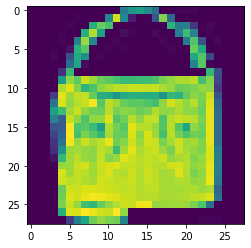

Label: 8


In [ ]:
#첫번쨰 iter에 나오는 데이터 확인
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze() #squeeze() : 차원이 1인 부분을 제거
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")


-----

### 변형(Transform)

In [ ]:
import torch
from torchvision import datasets 
from torchvision.transforms import ToTensor, Lambda

In [ ]:
ds = datasets.FashionMNIST(
    root = 'data',
    train=True,
    download=True,
    transform = ToTensor(), 
    #ToTensor() : PIL IMAGE나 numpy ndarray를 FloatTensor로 변환하고, 이미지 픽셀크기값을 [0,1]범위로 비례하여 조정(scaling)

    target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    #scatter_(dim, index, src)
    #정수를 one-hot으로 부호화된 텐서로 바꾸는 함수를 정의
    #크기가 10(=데이터셋 정답 개수)짜리 zero tensor를 만들고, 
    # scatter_를 호출하여 주어진 정답 y에 해당하는 인덱스에 value=1를 할당
    
)

In [ ]:
list(map(lambda y: y*2, range(5)))

[0, 2, 4, 6, 8]